## Scipy

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit


Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Expected Output:

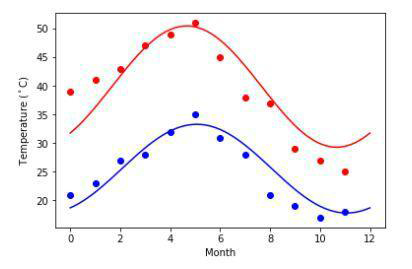

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


In [15]:
def temperature(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

result_max, cov_max = optimize.curve_fit(temperature, months,
                                      max_temp, [20, 10, 0])
result_min, cov_min = optimize.curve_fit(temperature, months,
                                      min_temp, [-40, 20, 0])

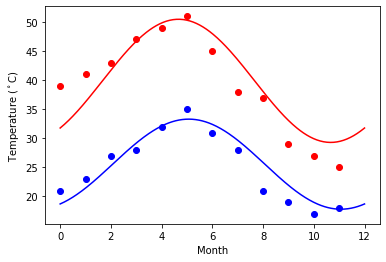

In [17]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, temperature(days, *result_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, temperature(days, *result_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()

## Matplotlib

In [19]:
import pandas as pd

In [20]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x1ca0e809208>,
 [Text(-0.9893411941747885, -0.4808367722094511, 'Male'),
  Text(0.9893412391939719, 0.4808366795806413, 'Female')],
 [Text(-0.5396406513680664, -0.26227460302333694, '64.4%'),
  Text(0.5396406759239846, 0.2622745524985316, '35.6%')])

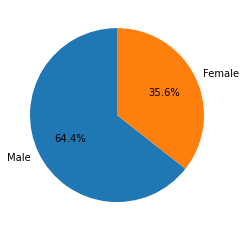

In [38]:
data = titanic_df.sex.value_counts()
plt.pie(data, 
        labels=['Male', 'Female'],
        startangle=90,
       autopct='%1.1f%%')

### Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='fare'>

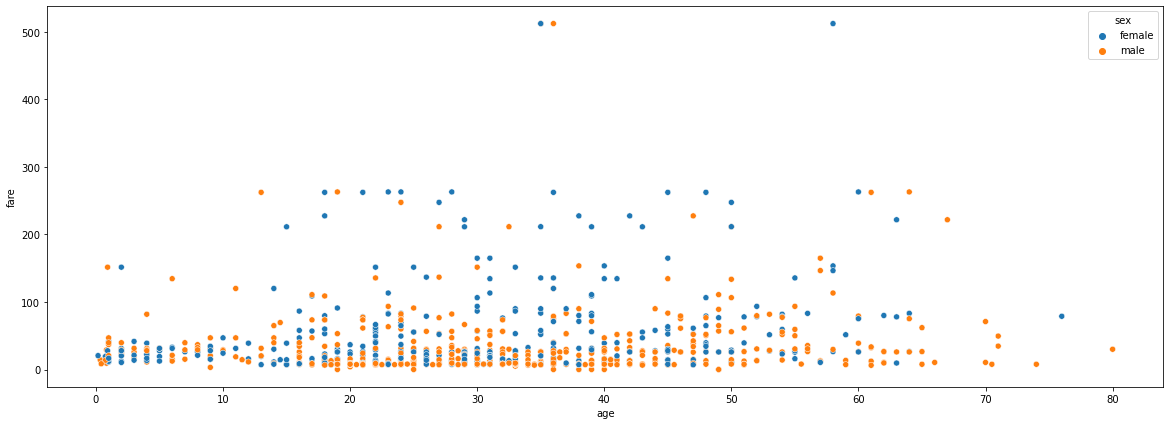

In [55]:
import seaborn as sb

fig = plt.gcf()
fig.set_size_inches(20,7)

sb.scatterplot(titanic_df.age, titanic_df.fare, hue = titanic_df.sex)